In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Intensity Histogram Descriptor

In [5]:
# Compute the histogram
def intensity_histogram(input_image):
    num_bins = 256  # Number of intensity levels (0-255 for grayscale)
    hist = cv2.calcHist([input_image], [0], None, [num_bins], [0, 256])

    # Normalize the histogram
    hist = hist / hist.sum()

    return hist

### Color Histogram

In [6]:
def color_histogram(image):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])

    plt.title("Color Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

### RmBG

In [7]:
import rembg

In [13]:
def removeBG(image):
    removed_bg_image = rembg.remove(image)
    return removed_bg_image

### Extracting Edge Features (Canny)

In [9]:
def canny_edge_detector(image):
    # Noise removing
    img_gaussian = cv2.GaussianBlur(image, (3, 3), 0)

    # CANNY method
    canny = cv2.Canny(img_gaussian, 100, 200)
    return canny

### Extracting Edge Features (Sobel)

In [21]:
def sobel_edge_detector(gray_image):
     # Noise removing
    img_gaussian = cv2.GaussianBlur(gray_image, (3, 3), 0)

    # Apply Sobel filter
    sobel_x = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate gradient magnitude
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    gradient_magnitude = np.uint8(gradient_magnitude)

    # Apply thresholding
    _, edges = cv2.threshold(gradient_magnitude, 0, 255, cv2.THRESH_OTSU)

    return edges

### Mean Pixel Value of Channels

In [19]:
def calculate_mean(image):
    # create a matrix of mean of all 3 channel of colored image   
    mean_matrix = np.zeros(image.shape[:2])
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            mean_matrix[row][col] = (int(image[row, col, 0]) + int(image[row, col, 1]) + int(image[row, col, 2])) / 3
            

    print(mean_matrix)

### Chain Code

In [17]:
def chain_code(gray_image):

    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)

        # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming we are interested in the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Initialize the chain code
    chain_code = []
    
    # Define the 8 possible directions (clockwise)
    directions = [
        (0, 1),  # Right
        (1, 1),  # Down-Right
        (1, 0),  # Down
        (1, -1), # Down-Left
        (0, -1), # Left
        (-1, -1),# Up-Left
        (-1, 0), # Up
        (-1, 1)  # Up-Right
    ]

    # Starting point (first point of the contour)
    start_point = tuple(largest_contour[0][0])
    current_point = start_point

    # Loop through the contour points to generate the chain code
    for point in largest_contour[:, 0, :]:
        dx = point[0] - current_point[0]
        dy = point[1] - current_point[1]

        # Find the direction of movement
        for i, (dx_dir, dy_dir) in enumerate(directions):
            if (dx_dir == dx) and (dy_dir == dy):
                chain_code.append(i)
                break

        current_point = tuple(point)

    return chain_code


### Thresholding (Otsu)

In [23]:
def otsu_thresholding(gray_image):
    # Apply Gaussian Blur to remove noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0.01)

    # OTSU THRESHOLDING
    # The second parameter is set to 0 to let Otsu'' method determine the optimal threshold value
    otsu_thresh, otsu_result = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return otsu_result

### SHOW Image FUNCTION

In [14]:
def showImage(first , second, title):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
    ax1.imshow(cv2.cvtColor(first, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(cv2.cvtColor(second, cv2.COLOR_BGR2RGB))
    ax2.set_title(title)
    ax2.axis('off')

    plt.show()

### Show Plot

In [15]:
def showPlot(first, second, title):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(first, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(second, color='black')
    plt.title("Intensity Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

# MAIN

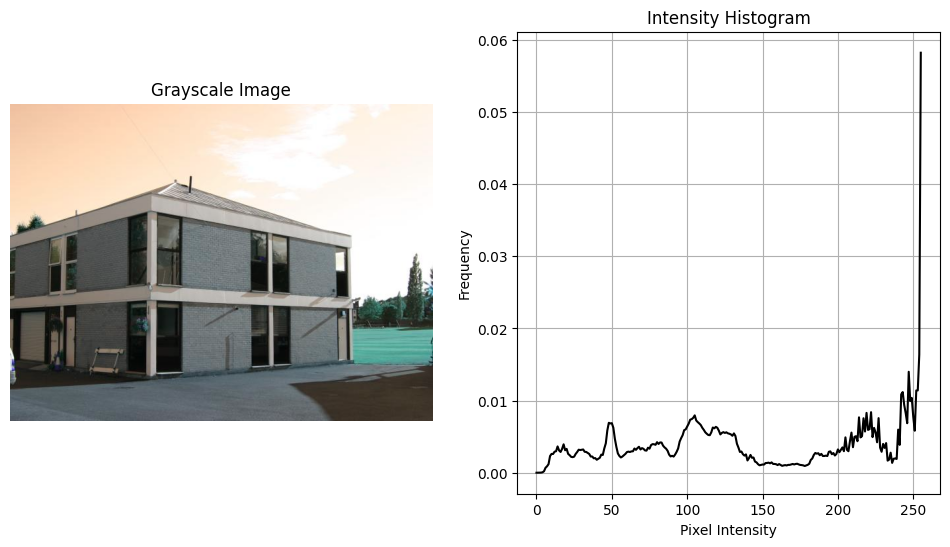

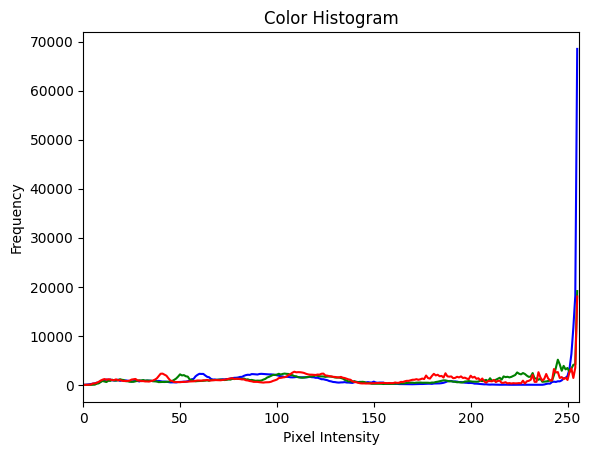

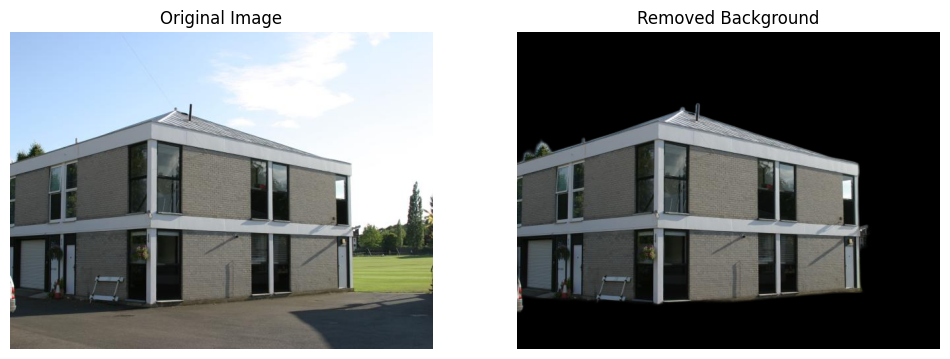

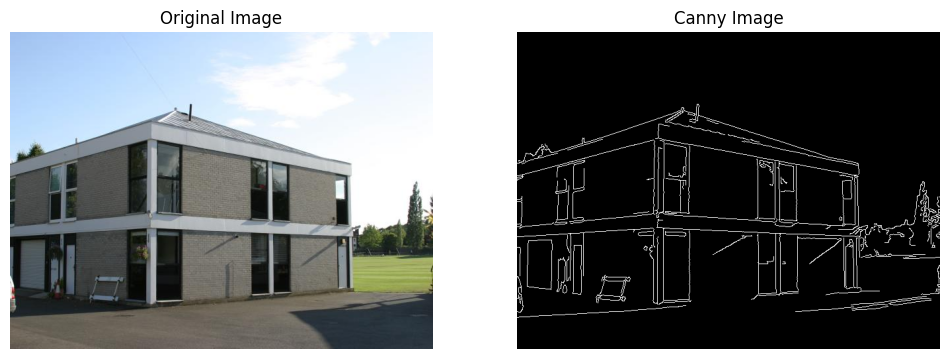

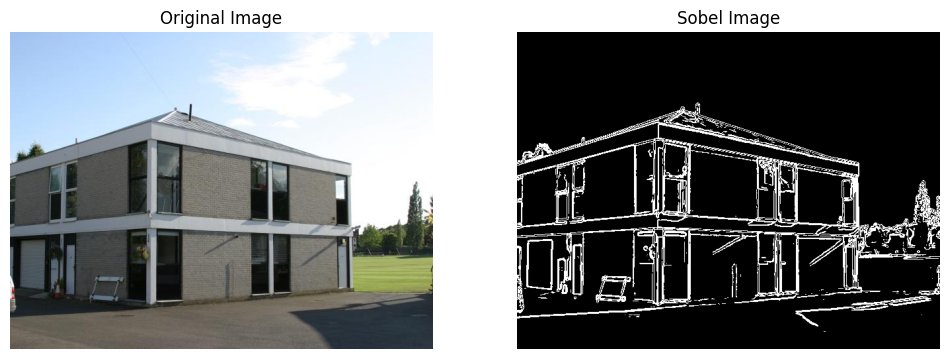

[[196.         196.         196.         ... 243.66666667 243.66666667
  243.66666667]
 [196.         196.         196.         ... 243.66666667 243.66666667
  243.66666667]
 [196.         196.         196.         ... 243.66666667 243.66666667
  243.66666667]
 ...
 [ 89.66666667  89.66666667  89.66666667 ...  54.          54.
   53.        ]
 [ 88.66666667  90.66666667  91.66666667 ...  56.          56.
   56.        ]
 [ 82.66666667  84.66666667  87.66666667 ...  59.          60.
   60.        ]]
[3, 3, 3, 3, 3, 5, 3, 5, 4, 3, 3, 2, 1, 3, 3, 0, 2, 3, 1, 3, 5, 3, 2, 3, 5, 3, 1, 3, 4, 5, 3, 3, 2, 1, 1, 0, 2, 1, 2, 1, 7, 1, 2, 1, 7, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 1, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 6, 7, 6, 6, 7, 6, 7, 6, 6, 7, 6, 7, 6, 7, 6, 0, 1, 3, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 2, 

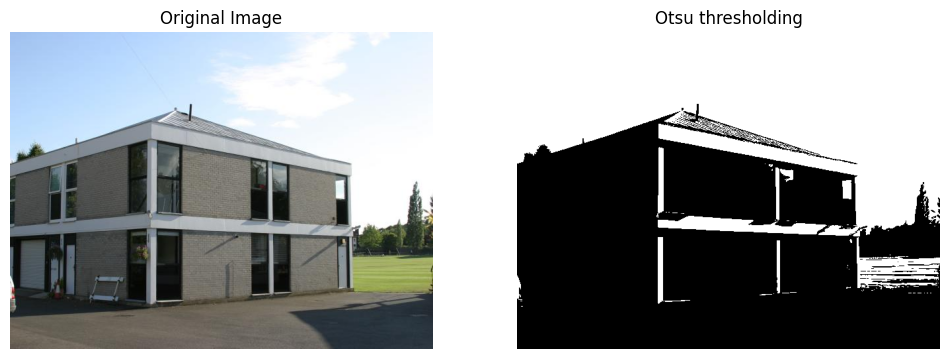

In [24]:
# Load the image in grayscale
image_path = 'msrcorid/buildings/183_8326.JPG'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

if image is None:
    raise ValueError("Image not found. Please provide a valid image path.")

# intensity histogram
hist = intensity_histogram(gray_image)
showPlot(image, hist, 'Intensity Histogram')

# color histogram
color_histogram(image)

# rembg
no_bg = removeBG(image)
showImage(image, no_bg, 'Removed Background')

# canny
canny = canny_edge_detector(gray_image)
showImage(image, canny, title='Canny Image')

# sobel
canny = sobel_edge_detector(gray_image)
showImage(image, canny, title='Sobel Image')

# mean pixel value
calculate_mean(image)

# chain code
print(chain_code(gray_image))

# Otsu thresholding
otsu = otsu_thresholding(gray_image)
showImage(image, otsu, title='Otsu thresholding')
